# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [341]:
m = 1
A = 0.010#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [342]:
(0.12872627258300784+0.12872634887695314)/2

0.12872631072998048

In [343]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [344]:
global compactified=true
global loggrid=true

global bisection=false

false

In [345]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*100.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [346]:
print(N)

100.0

In [347]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [348]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [349]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
    global jacobian_func = Spline1D(originalX[4:L-3], analytic_jacobian(originalX[4:L-3]),  k=4);
end;

step size is  0.01
the time step is 0.001


# Initial data of m β Ψ and Ψ,x

In [350]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [351]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [352]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [353]:
y0=Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

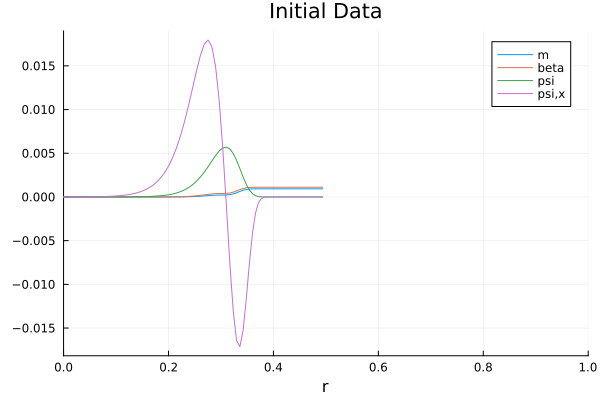

In [354]:
using Plots #showing initial data and the initial status of the horizon finder
plot(compactify.(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

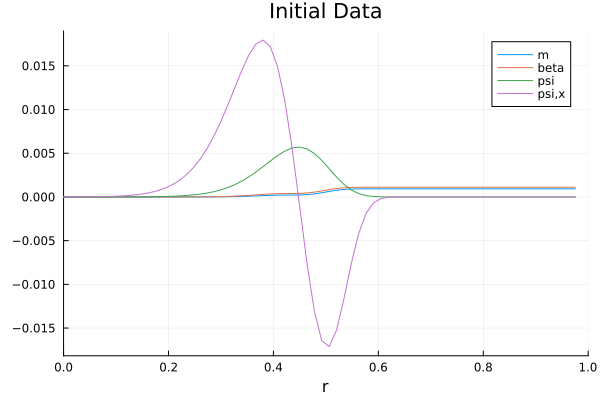

In [355]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [356]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [357]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [358]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.1999260758100009


In [359]:
using Base.Threads
Threads.nthreads()

4

In [361]:
#global dt=5e-5

5.0e-5

 ## Time evolution

fixed grid

In [362]:
finaltime=3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 20 dt is 5.0e-5, t=0.0010000000000000002 speed is 0.49980017379437525, dx/dt=200.0


iteration 40 dt is 5.0e-5, t=0.0019999999999999987 speed is 0.4998001737943754, dx/dt=200.0


iteration 60 dt is 5.0e-5, t=0.0030000000000000014 speed is 0.49980017379437536, dx/dt=200.0


iteration 80 dt is 5.0e-5, t=0.0040000000000000036 speed is 0.4998001737943754, dx/dt=200.0


iteration 100 dt is 5.0e-5, t=0.0049999999999999975 speed is 0.49980017379437536, dx/dt=200.0


iteration 120 dt is 5.0e-5, t=0.0059999999999999915 speed is 0.49980017379437536, dx/dt=200.0


iteration 140 dt is 5.0e-5, t=0.006999999999999985 speed is 0.49980017379437547, dx/dt=200.0


iteration 160 dt is 5.0e-5, t=0.00799999999999998 speed is 0.4998001737943754, dx/dt=200.0


iteration 180 dt is 5.0e-5, t=0.008999999999999973 speed is 0.4998001737943755, dx/dt=200.0


iteration 200 dt is 5.0e-5, t=0.009999999999999967 speed is 0.49980017379437547, dx/dt=200.0


iteration 220 dt is 5.0e-5, t=0.010999999999999961 



iteration 1760 dt is 5.0e-5, t=0.08799999999999847 speed is 0.49980017379438213, dx/dt=200.0


iteration 1780 dt is 5.0e-5, t=0.08899999999999836 speed is 0.4998001737943823, dx/dt=200.0


iteration 1800 dt is 5.0e-5, t=0.08999999999999825 speed is 0.4998001737943825, dx/dt=200.0


iteration 1820 dt is 5.0e-5, t=0.09099999999999814 speed is 0.49980017379438274, dx/dt=200.0


iteration 1840 dt is 5.0e-5, t=0.09199999999999803 speed is 0.4998001737943829, dx/dt=200.0


iteration 1860 dt is 5.0e-5, t=0.09299999999999792 speed is 0.49980017379438313, dx/dt=200.0


iteration 1880 dt is 5.0e-5, t=0.09399999999999781 speed is 0.49980017379438335, dx/dt=200.0


iteration 1900 dt is 5.0e-5, t=0.0949999999999977 speed is 0.4998001737943837, dx/dt=200.0


iteration 1920 dt is 5.0e-5, t=0.09599999999999759 speed is 0.4998001737943839, dx/dt=200.0


iteration 1940 dt is 5.0e-5, t=0.09699999999999748 speed is 0.49980017379438424, dx/dt=200.0


iteration 1960 dt is 5.0e-5, t=0.09799999999999737 spe



iteration 5260 dt is 5.0e-5, t=0.2629999999999792 speed is 0.4998001737947681, dx/dt=200.0


iteration 5280 dt is 5.0e-5, t=0.2639999999999791 speed is 0.4998001737947756, dx/dt=200.0


iteration 5300 dt is 5.0e-5, t=0.264999999999979 speed is 0.49980017379478303, dx/dt=200.0


iteration 5320 dt is 5.0e-5, t=0.26599999999997886 speed is 0.49980017379479064, dx/dt=200.0


iteration 5340 dt is 5.0e-5, t=0.26699999999997875 speed is 0.4998001737947984, dx/dt=200.0


iteration 5360 dt is 5.0e-5, t=0.26799999999997864 speed is 0.49980017379480635, dx/dt=200.0


iteration 5380 dt is 5.0e-5, t=0.26899999999997853 speed is 0.4998001737948145, dx/dt=200.0


iteration 5400 dt is 5.0e-5, t=0.2699999999999784 speed is 0.49980017379482256, dx/dt=200.0


iteration 5420 dt is 5.0e-5, t=0.2709999999999783 speed is 0.4998001737948308, dx/dt=200.0


iteration 5440 dt is 5.0e-5, t=0.2719999999999782 speed is 0.4998001737948394, dx/dt=200.0


iteration 5460 dt is 5.0e-5, t=0.2729999999999781 speed is 0.



iteration 7020 dt is 5.0e-5, t=0.3509999999999695 speed is 0.49980017379615715, dx/dt=200.0


iteration 7040 dt is 5.0e-5, t=0.3519999999999694 speed is 0.49980017379618547, dx/dt=200.0


iteration 7060 dt is 5.0e-5, t=0.3529999999999693 speed is 0.4998001737962142, dx/dt=200.0


iteration 7080 dt is 5.0e-5, t=0.3539999999999692 speed is 0.4998001737962433, dx/dt=200.0


iteration 7100 dt is 5.0e-5, t=0.35499999999996906 speed is 0.49980017379627295, dx/dt=200.0


iteration 7120 dt is 5.0e-5, t=0.35599999999996895 speed is 0.49980017379630276, dx/dt=200.0


iteration 7140 dt is 5.0e-5, t=0.35699999999996884 speed is 0.49980017379633324, dx/dt=200.0


iteration 7160 dt is 5.0e-5, t=0.35799999999996873 speed is 0.499800173796364, dx/dt=200.0


iteration 7180 dt is 5.0e-5, t=0.3589999999999686 speed is 0.4998001737963952, dx/dt=200.0


iteration 7200 dt is 5.0e-5, t=0.3599999999999685 speed is 0.4998001737964268, dx/dt=200.0


iteration 7220 dt is 5.0e-5, t=0.3609999999999684 speed is 0



iteration 8780 dt is 5.0e-5, t=0.4389999999999598 speed is 0.4998001738007897, dx/dt=200.0


iteration 8800 dt is 5.0e-5, t=0.4399999999999597 speed is 0.499800173800876, dx/dt=200.0


iteration 8820 dt is 5.0e-5, t=0.4409999999999596 speed is 0.49980017380096325, dx/dt=200.0


iteration 8840 dt is 5.0e-5, t=0.4419999999999595 speed is 0.49980017380105163, dx/dt=200.0


iteration 8860 dt is 5.0e-5, t=0.44299999999995937 speed is 0.49980017380114083, dx/dt=200.0


iteration 8880 dt is 5.0e-5, t=0.44399999999995926 speed is 0.4998001738012312, dx/dt=200.0


iteration 8900 dt is 5.0e-5, t=0.44499999999995915 speed is 0.49980017380132247, dx/dt=200.0


iteration 8920 dt is 5.0e-5, t=0.44599999999995904 speed is 0.49980017380141484, dx/dt=200.0


iteration 8940 dt is 5.0e-5, t=0.44699999999995893 speed is 0.4998001738015083, dx/dt=200.0


iteration 8960 dt is 5.0e-5, t=0.4479999999999588 speed is 0.49980017380160285, dx/dt=200.0


iteration 8980 dt is 5.0e-5, t=0.4489999999999587 speed is



iteration 10560 dt is 5.0e-5, t=0.5279999999999501 speed is 0.4998001738134822, dx/dt=200.0


iteration 10580 dt is 5.0e-5, t=0.52899999999995 speed is 0.49980017381369657, dx/dt=200.0


iteration 10600 dt is 5.0e-5, t=0.5299999999999498 speed is 0.4998001738139131, dx/dt=200.0


iteration 10620 dt is 5.0e-5, t=0.5309999999999497 speed is 0.49980017381413155, dx/dt=200.0


iteration 10640 dt is 5.0e-5, t=0.5319999999999496 speed is 0.4998001738143521, dx/dt=200.0


iteration 10660 dt is 5.0e-5, t=0.5329999999999495 speed is 0.4998001738145745, dx/dt=200.0


iteration 10680 dt is 5.0e-5, t=0.5339999999999494 speed is 0.4998001738147988, dx/dt=200.0


iteration 10700 dt is 5.0e-5, t=0.5349999999999493 speed is 0.4998001738150252, dx/dt=200.0


iteration 10720 dt is 5.0e-5, t=0.5359999999999492 speed is 0.49980017381525355, dx/dt=200.0


iteration 10740 dt is 5.0e-5, t=0.5369999999999491 speed is 0.49980017381548403, dx/dt=200.0


iteration 10760 dt is 5.0e-5, t=0.537999999999949 speed 



iteration 12300 dt is 5.0e-5, t=0.6149999999999405 speed is 0.4998001738405847, dx/dt=200.0


iteration 12320 dt is 5.0e-5, t=0.6159999999999404 speed is 0.499800173841008, dx/dt=200.0


iteration 12340 dt is 5.0e-5, t=0.6169999999999403 speed is 0.4998001738414341, dx/dt=200.0


iteration 12360 dt is 5.0e-5, t=0.6179999999999402 speed is 0.499800173841863, dx/dt=200.0


iteration 12380 dt is 5.0e-5, t=0.61899999999994 speed is 0.4998001738422947, dx/dt=200.0


iteration 12400 dt is 5.0e-5, t=0.6199999999999399 speed is 0.4998001738427292, dx/dt=200.0


iteration 12420 dt is 5.0e-5, t=0.6209999999999398 speed is 0.49980017384316644, dx/dt=200.0


iteration 12440 dt is 5.0e-5, t=0.6219999999999397 speed is 0.4998001738436066, dx/dt=200.0


iteration 12460 dt is 5.0e-5, t=0.6229999999999396 speed is 0.4998001738440494, dx/dt=200.0


iteration 12480 dt is 5.0e-5, t=0.6239999999999395 speed is 0.4998001738444951, dx/dt=200.0


iteration 12500 dt is 5.0e-5, t=0.6249999999999394 speed is 0



iteration 14040 dt is 5.0e-5, t=0.7019999999999309 speed is 0.4998001738879537, dx/dt=200.0


iteration 14060 dt is 5.0e-5, t=0.7029999999999308 speed is 0.49980017388861764, dx/dt=200.0


iteration 14080 dt is 5.0e-5, t=0.7039999999999307 speed is 0.4998001738892841, dx/dt=200.0


iteration 14100 dt is 5.0e-5, t=0.7049999999999306 speed is 0.4998001738899527, dx/dt=200.0


iteration 14120 dt is 5.0e-5, t=0.7059999999999305 speed is 0.4998001738906239, dx/dt=200.0


iteration 14140 dt is 5.0e-5, t=0.7069999999999304 speed is 0.49980017389129755, dx/dt=200.0


iteration 14160 dt is 5.0e-5, t=0.7079999999999302 speed is 0.4998001738919733, dx/dt=200.0


iteration 14180 dt is 5.0e-5, t=0.7089999999999301 speed is 0.49980017389265174, dx/dt=200.0


iteration 14200 dt is 5.0e-5, t=0.70999999999993 speed is 0.49980017389333237, dx/dt=200.0


iteration 14220 dt is 5.0e-5, t=0.7109999999999299 speed is 0.49980017389401526, dx/dt=200.0


iteration 14240 dt is 5.0e-5, t=0.7119999999999298 spee



iteration 15780 dt is 5.0e-5, t=0.7889999999999213 speed is 0.4998001739523315, dx/dt=200.0


iteration 15800 dt is 5.0e-5, t=0.7899999999999212 speed is 0.49980017395310916, dx/dt=200.0


iteration 15820 dt is 5.0e-5, t=0.7909999999999211 speed is 0.49980017395388665, dx/dt=200.0


iteration 15840 dt is 5.0e-5, t=0.791999999999921 speed is 0.49980017395466375, dx/dt=200.0


iteration 15860 dt is 5.0e-5, t=0.7929999999999209 speed is 0.49980017395544035, dx/dt=200.0


iteration 15880 dt is 5.0e-5, t=0.7939999999999208 speed is 0.4998001739562166, dx/dt=200.0


iteration 15900 dt is 5.0e-5, t=0.7949999999999207 speed is 0.4998001739569923, dx/dt=200.0


iteration 15920 dt is 5.0e-5, t=0.7959999999999205 speed is 0.4998001739577675, dx/dt=200.0


iteration 15940 dt is 5.0e-5, t=0.7969999999999204 speed is 0.4998001739585421, dx/dt=200.0


iteration 15960 dt is 5.0e-5, t=0.7979999999999203 speed is 0.499800173959316, dx/dt=200.0


iteration 15980 dt is 5.0e-5, t=0.7989999999999202 speed



iteration 17520 dt is 5.0e-5, t=0.8759999999999117 speed is 0.4998001740131796, dx/dt=200.0


iteration 17540 dt is 5.0e-5, t=0.8769999999999116 speed is 0.4998001740137248, dx/dt=200.0


iteration 17560 dt is 5.0e-5, t=0.8779999999999115 speed is 0.4998001740142648, dx/dt=200.0


iteration 17580 dt is 5.0e-5, t=0.8789999999999114 speed is 0.49980017401479937, dx/dt=200.0


iteration 17600 dt is 5.0e-5, t=0.8799999999999113 speed is 0.49980017401532856, dx/dt=200.0


iteration 17620 dt is 5.0e-5, t=0.8809999999999112 speed is 0.49980017401585214, dx/dt=200.0


iteration 17640 dt is 5.0e-5, t=0.8819999999999111 speed is 0.4998001740163703, dx/dt=200.0


iteration 17660 dt is 5.0e-5, t=0.882999999999911 speed is 0.4998001740168827, dx/dt=200.0


iteration 17680 dt is 5.0e-5, t=0.8839999999999109 speed is 0.49980017401738963, dx/dt=200.0


iteration 17700 dt is 5.0e-5, t=0.8849999999999107 speed is 0.4998001740178906, dx/dt=200.0


iteration 17720 dt is 5.0e-5, t=0.8859999999999106 spee



iteration 19260 dt is 5.0e-5, t=0.9629999999999022 speed is 0.4998001740346934, dx/dt=200.0


iteration 19280 dt is 5.0e-5, t=0.963999999999902 speed is 0.49980017403457255, dx/dt=200.0


iteration 19300 dt is 5.0e-5, t=0.9649999999999019 speed is 0.49980017403444216, dx/dt=200.0


iteration 19320 dt is 5.0e-5, t=0.9659999999999018 speed is 0.49980017403430227, dx/dt=200.0


iteration 19340 dt is 5.0e-5, t=0.9669999999999017 speed is 0.49980017403415283, dx/dt=200.0


iteration 19360 dt is 5.0e-5, t=0.9679999999999016 speed is 0.4998001740339939, dx/dt=200.0


iteration 19380 dt is 5.0e-5, t=0.9689999999999015 speed is 0.4998001740338253, dx/dt=200.0


iteration 19400 dt is 5.0e-5, t=0.9699999999999014 speed is 0.499800174033647, dx/dt=200.0


iteration 19420 dt is 5.0e-5, t=0.9709999999999013 speed is 0.49980017403345905, dx/dt=200.0


iteration 19440 dt is 5.0e-5, t=0.9719999999999012 speed is 0.49980017403326155, dx/dt=200.0


iteration 19460 dt is 5.0e-5, t=0.972999999999901 spee



iteration 21020 dt is 5.0e-5, t=1.0510000000000057 speed is 0.49980017398723836, dx/dt=200.0


iteration 21040 dt is 5.0e-5, t=1.0520000000000078 speed is 0.4998001739862956, dx/dt=200.0


iteration 21060 dt is 5.0e-5, t=1.05300000000001 speed is 0.4998001739853451, dx/dt=200.0


iteration 21080 dt is 5.0e-5, t=1.054000000000012 speed is 0.4998001739843868, dx/dt=200.0


iteration 21100 dt is 5.0e-5, t=1.0550000000000141 speed is 0.499800173983421, dx/dt=200.0


iteration 21120 dt is 5.0e-5, t=1.0560000000000163 speed is 0.4998001739824477, dx/dt=200.0


iteration 21140 dt is 5.0e-5, t=1.0570000000000184 speed is 0.4998001739814668, dx/dt=200.0


iteration 21160 dt is 5.0e-5, t=1.0580000000000205 speed is 0.49980017398047855, dx/dt=200.0


iteration 21180 dt is 5.0e-5, t=1.0590000000000226 speed is 0.49980017397948295, dx/dt=200.0


iteration 21200 dt is 5.0e-5, t=1.0600000000000247 speed is 0.4998001739784803, dx/dt=200.0


iteration 21220 dt is 5.0e-5, t=1.0610000000000268 speed is



iteration 22760 dt is 5.0e-5, t=1.1380000000001893 speed is 0.49980017388632325, dx/dt=200.0


iteration 22780 dt is 5.0e-5, t=1.1390000000001914 speed is 0.49980017388509235, dx/dt=200.0


iteration 22800 dt is 5.0e-5, t=1.1400000000001935 speed is 0.499800173883864, dx/dt=200.0


iteration 22820 dt is 5.0e-5, t=1.1410000000001956 speed is 0.4998001738826385, dx/dt=200.0


iteration 22840 dt is 5.0e-5, t=1.1420000000001977 speed is 0.4998001738814156, dx/dt=200.0


iteration 22860 dt is 5.0e-5, t=1.1430000000001999 speed is 0.49980017388019593, dx/dt=200.0


iteration 22880 dt is 5.0e-5, t=1.144000000000202 speed is 0.49980017387897924, dx/dt=200.0


iteration 22900 dt is 5.0e-5, t=1.145000000000204 speed is 0.49980017387776604, dx/dt=200.0


iteration 22920 dt is 5.0e-5, t=1.1460000000002062 speed is 0.49980017387655623, dx/dt=200.0


iteration 22940 dt is 5.0e-5, t=1.1470000000002083 speed is 0.4998001738753499, dx/dt=200.0


iteration 22960 dt is 5.0e-5, t=1.1480000000002104 spee



iteration 24500 dt is 5.0e-5, t=1.225000000000373 speed is 0.4998001738059336, dx/dt=200.0


iteration 24520 dt is 5.0e-5, t=1.226000000000375 speed is 0.4998001738055305, dx/dt=200.0


iteration 24540 dt is 5.0e-5, t=1.2270000000003771 speed is 0.49980017380514363, dx/dt=200.0


iteration 24560 dt is 5.0e-5, t=1.2280000000003792 speed is 0.4998001738047734, dx/dt=200.0


iteration 24580 dt is 5.0e-5, t=1.2290000000003813 speed is 0.49980017380442, dx/dt=200.0


iteration 24600 dt is 5.0e-5, t=1.2300000000003835 speed is 0.4998001738040833, dx/dt=200.0


iteration 24620 dt is 5.0e-5, t=1.2310000000003856 speed is 0.49980017380376357, dx/dt=200.0


iteration 24640 dt is 5.0e-5, t=1.2320000000003877 speed is 0.49980017380346103, dx/dt=200.0


iteration 24660 dt is 5.0e-5, t=1.2330000000003898 speed is 0.4998001738031756, dx/dt=200.0


iteration 24680 dt is 5.0e-5, t=1.234000000000392 speed is 0.4998001738029076, dx/dt=200.0


iteration 24700 dt is 5.0e-5, t=1.235000000000394 speed is 0



iteration 26280 dt is 5.0e-5, t=1.3140000000005607 speed is 0.4998001738467877, dx/dt=200.0


iteration 26300 dt is 5.0e-5, t=1.3150000000005628 speed is 0.4998001738482262, dx/dt=200.0


iteration 26320 dt is 5.0e-5, t=1.316000000000565 speed is 0.4998001738496876, dx/dt=200.0


iteration 26340 dt is 5.0e-5, t=1.317000000000567 speed is 0.49980017385117165, dx/dt=200.0


iteration 26360 dt is 5.0e-5, t=1.3180000000005692 speed is 0.49980017385267816, dx/dt=200.0


iteration 26380 dt is 5.0e-5, t=1.3190000000005713 speed is 0.49980017385420744, dx/dt=200.0


iteration 26400 dt is 5.0e-5, t=1.3200000000005734 speed is 0.49980017385575926, dx/dt=200.0


iteration 26420 dt is 5.0e-5, t=1.3210000000005755 speed is 0.4998001738573338, dx/dt=200.0


iteration 26440 dt is 5.0e-5, t=1.3220000000005776 speed is 0.4998001738589308, dx/dt=200.0


iteration 26460 dt is 5.0e-5, t=1.3230000000005797 speed is 0.49980017386055037, dx/dt=200.0


iteration 26480 dt is 5.0e-5, t=1.3240000000005818 spee



iteration 28040 dt is 5.0e-5, t=1.4020000000007464 speed is 0.49980017405291743, dx/dt=200.0


iteration 28060 dt is 5.0e-5, t=1.4030000000007485 speed is 0.4998001740560337, dx/dt=200.0


iteration 28080 dt is 5.0e-5, t=1.4040000000007506 speed is 0.49980017405916255, dx/dt=200.0


iteration 28100 dt is 5.0e-5, t=1.4050000000007528 speed is 0.49980017406230365, dx/dt=200.0


iteration 28120 dt is 5.0e-5, t=1.4060000000007549 speed is 0.49980017406545685, dx/dt=200.0


iteration 28140 dt is 5.0e-5, t=1.407000000000757 speed is 0.49980017406862204, dx/dt=200.0


iteration 28160 dt is 5.0e-5, t=1.408000000000759 speed is 0.4998001740717989, dx/dt=200.0


iteration 28180 dt is 5.0e-5, t=1.4090000000007612 speed is 0.4998001740749871, dx/dt=200.0


iteration 28200 dt is 5.0e-5, t=1.4100000000007633 speed is 0.49980017407818655, dx/dt=200.0


iteration 28220 dt is 5.0e-5, t=1.4110000000007654 speed is 0.4998001740813972, dx/dt=200.0


iteration 28240 dt is 5.0e-5, t=1.4120000000007675 spe



iteration 29820 dt is 5.0e-5, t=1.4910000000009342 speed is 0.4998001743527484, dx/dt=200.0


iteration 29840 dt is 5.0e-5, t=1.4920000000009364 speed is 0.499800174356038, dx/dt=200.0


iteration 29860 dt is 5.0e-5, t=1.4930000000009385 speed is 0.4998001743593179, dx/dt=200.0


iteration 29880 dt is 5.0e-5, t=1.4940000000009406 speed is 0.4998001743625877, dx/dt=200.0


iteration 29900 dt is 5.0e-5, t=1.4950000000009427 speed is 0.49980017436584734, dx/dt=200.0


iteration 29920 dt is 5.0e-5, t=1.4960000000009448 speed is 0.4998001743690966, dx/dt=200.0


iteration 29940 dt is 5.0e-5, t=1.497000000000947 speed is 0.49980017437233487, dx/dt=200.0


iteration 29960 dt is 5.0e-5, t=1.498000000000949 speed is 0.4998001743755622, dx/dt=200.0


iteration 29980 dt is 5.0e-5, t=1.4990000000009511 speed is 0.4998001743787782, dx/dt=200.0


iteration 30000 dt is 5.0e-5, t=1.5000000000009532 speed is 0.4998001743819827, dx/dt=200.0


iteration 30020 dt is 5.0e-5, t=1.5010000000009553 speed is



iteration 31580 dt is 5.0e-5, t=1.57900000000112 speed is 0.49980017457872744, dx/dt=200.0


iteration 31600 dt is 5.0e-5, t=1.580000000001122 speed is 0.49980017458028486, dx/dt=200.0


iteration 31620 dt is 5.0e-5, t=1.5810000000011242 speed is 0.4998001745818145, dx/dt=200.0


iteration 31640 dt is 5.0e-5, t=1.5820000000011263 speed is 0.49980017458331644, dx/dt=200.0


iteration 31660 dt is 5.0e-5, t=1.5830000000011284 speed is 0.49980017458479026, dx/dt=200.0


iteration 31680 dt is 5.0e-5, t=1.5840000000011305 speed is 0.499800174586236, dx/dt=200.0


iteration 31700 dt is 5.0e-5, t=1.5850000000011326 speed is 0.4998001745876536, dx/dt=200.0


iteration 31720 dt is 5.0e-5, t=1.5860000000011347 speed is 0.49980017458904274, dx/dt=200.0


iteration 31740 dt is 5.0e-5, t=1.5870000000011368 speed is 0.49980017459040355, dx/dt=200.0


iteration 31760 dt is 5.0e-5, t=1.588000000001139 speed is 0.49980017459173587, dx/dt=200.0


iteration 31780 dt is 5.0e-5, t=1.589000000001141 speed 



iteration 33320 dt is 5.0e-5, t=1.6660000000013035 speed is 0.4998001746034298, dx/dt=200.0


iteration 33340 dt is 5.0e-5, t=1.6670000000013057 speed is 0.4998001746023984, dx/dt=200.0


iteration 33360 dt is 5.0e-5, t=1.6680000000013078 speed is 0.4998001746013385, dx/dt=200.0


iteration 33380 dt is 5.0e-5, t=1.6690000000013099 speed is 0.49980017460025034, dx/dt=200.0


iteration 33400 dt is 5.0e-5, t=1.670000000001312 speed is 0.4998001745991339, dx/dt=200.0


iteration 33420 dt is 5.0e-5, t=1.671000000001314 speed is 0.4998001745979892, dx/dt=200.0


iteration 33440 dt is 5.0e-5, t=1.6720000000013162 speed is 0.4998001745968166, dx/dt=200.0


iteration 33460 dt is 5.0e-5, t=1.6730000000013183 speed is 0.4998001745956161, dx/dt=200.0


iteration 33480 dt is 5.0e-5, t=1.6740000000013204 speed is 0.49980017459438747, dx/dt=200.0


iteration 33500 dt is 5.0e-5, t=1.6750000000013225 speed is 0.4998001745931314, dx/dt=200.0


iteration 33520 dt is 5.0e-5, t=1.6760000000013247 speed i



iteration 35080 dt is 5.0e-5, t=1.7540000000014893 speed is 0.4998001744198289, dx/dt=200.0


iteration 35100 dt is 5.0e-5, t=1.7550000000014914 speed is 0.4998001744169043, dx/dt=200.0


iteration 35120 dt is 5.0e-5, t=1.7560000000014935 speed is 0.49980017441396724, dx/dt=200.0


iteration 35140 dt is 5.0e-5, t=1.7570000000014956 speed is 0.4998001744110181, dx/dt=200.0


iteration 35160 dt is 5.0e-5, t=1.7580000000014977 speed is 0.4998001744080569, dx/dt=200.0


iteration 35180 dt is 5.0e-5, t=1.7590000000014998 speed is 0.49980017440508395, dx/dt=200.0


iteration 35200 dt is 5.0e-5, t=1.760000000001502 speed is 0.4998001744020997, dx/dt=200.0


iteration 35220 dt is 5.0e-5, t=1.761000000001504 speed is 0.4998001743991041, dx/dt=200.0


iteration 35240 dt is 5.0e-5, t=1.7620000000015061 speed is 0.4998001743960976, dx/dt=200.0


iteration 35260 dt is 5.0e-5, t=1.7630000000015082 speed is 0.4998001743930803, dx/dt=200.0


iteration 35280 dt is 5.0e-5, t=1.7640000000015104 speed i



iteration 36860 dt is 5.0e-5, t=1.843000000001677 speed is 0.49980017413772293, dx/dt=200.0


iteration 36880 dt is 5.0e-5, t=1.8440000000016792 speed is 0.4998001741346067, dx/dt=200.0


iteration 36900 dt is 5.0e-5, t=1.8450000000016813 speed is 0.49980017413149797, dx/dt=200.0


iteration 36920 dt is 5.0e-5, t=1.8460000000016834 speed is 0.49980017412839706, dx/dt=200.0


iteration 36940 dt is 5.0e-5, t=1.8470000000016855 speed is 0.4998001741253041, dx/dt=200.0


iteration 36960 dt is 5.0e-5, t=1.8480000000016876 speed is 0.4998001741222194, dx/dt=200.0


iteration 36980 dt is 5.0e-5, t=1.8490000000016897 speed is 0.4998001741191429, dx/dt=200.0


iteration 37000 dt is 5.0e-5, t=1.8500000000016918 speed is 0.4998001741160748, dx/dt=200.0


iteration 37020 dt is 5.0e-5, t=1.851000000001694 speed is 0.4998001741130156, dx/dt=200.0


iteration 37040 dt is 5.0e-5, t=1.852000000001696 speed is 0.49980017410996513, dx/dt=200.0


iteration 37060 dt is 5.0e-5, t=1.8530000000016982 speed 



iteration 38620 dt is 5.0e-5, t=1.9310000000018628 speed is 0.49980017390917547, dx/dt=200.0


iteration 38640 dt is 5.0e-5, t=1.932000000001865 speed is 0.4998001739072585, dx/dt=200.0


iteration 38660 dt is 5.0e-5, t=1.933000000001867 speed is 0.4998001739053589, dx/dt=200.0


iteration 38680 dt is 5.0e-5, t=1.9340000000018691 speed is 0.499800173903477, dx/dt=200.0


iteration 38700 dt is 5.0e-5, t=1.9350000000018712 speed is 0.4998001739016126, dx/dt=200.0


iteration 38720 dt is 5.0e-5, t=1.9360000000018733 speed is 0.4998001738997658, dx/dt=200.0


iteration 38740 dt is 5.0e-5, t=1.9370000000018754 speed is 0.49980017389793674, dx/dt=200.0


iteration 38760 dt is 5.0e-5, t=1.9380000000018776 speed is 0.4998001738961251, dx/dt=200.0


iteration 38780 dt is 5.0e-5, t=1.9390000000018797 speed is 0.4998001738943313, dx/dt=200.0


iteration 38800 dt is 5.0e-5, t=1.9400000000018818 speed is 0.49980017389255527, dx/dt=200.0


iteration 38820 dt is 5.0e-5, t=1.9410000000018839 speed i



iteration 40380 dt is 5.0e-5, t=2.019000000001964 speed is 0.49980017380730773, dx/dt=200.0


iteration 40400 dt is 5.0e-5, t=2.0200000000019616 speed is 0.49980017380688285, dx/dt=200.0


iteration 40420 dt is 5.0e-5, t=2.0210000000019592 speed is 0.49980017380647246, dx/dt=200.0


iteration 40440 dt is 5.0e-5, t=2.022000000001957 speed is 0.49980017380607655, dx/dt=200.0


iteration 40460 dt is 5.0e-5, t=2.0230000000019546 speed is 0.4998001738056952, dx/dt=200.0


iteration 40480 dt is 5.0e-5, t=2.0240000000019522 speed is 0.499800173805328, dx/dt=200.0


iteration 40500 dt is 5.0e-5, t=2.02500000000195 speed is 0.4998001738049752, dx/dt=200.0


iteration 40520 dt is 5.0e-5, t=2.0260000000019476 speed is 0.49980017380463654, dx/dt=200.0


iteration 40540 dt is 5.0e-5, t=2.0270000000019452 speed is 0.49980017380431185, dx/dt=200.0


iteration 40560 dt is 5.0e-5, t=2.028000000001943 speed is 0.4998001738040011, dx/dt=200.0


iteration 40580 dt is 5.0e-5, t=2.0290000000019406 speed i



iteration 42160 dt is 5.0e-5, t=2.1080000000017565 speed is 0.4998001738154372, dx/dt=200.0


iteration 42180 dt is 5.0e-5, t=2.109000000001754 speed is 0.49980017381591485, dx/dt=200.0


iteration 42200 dt is 5.0e-5, t=2.110000000001752 speed is 0.4998001738163979, dx/dt=200.0


iteration 42220 dt is 5.0e-5, t=2.1110000000017495 speed is 0.49980017381688613, dx/dt=200.0


iteration 42240 dt is 5.0e-5, t=2.112000000001747 speed is 0.49980017381737946, dx/dt=200.0


iteration 42260 dt is 5.0e-5, t=2.113000000001745 speed is 0.4998001738178777, dx/dt=200.0


iteration 42280 dt is 5.0e-5, t=2.1140000000017425 speed is 0.49980017381838077, dx/dt=200.0


iteration 42300 dt is 5.0e-5, t=2.11500000000174 speed is 0.49980017381888875, dx/dt=200.0


iteration 42320 dt is 5.0e-5, t=2.116000000001738 speed is 0.4998001738194012, dx/dt=200.0


iteration 42340 dt is 5.0e-5, t=2.1170000000017355 speed is 0.49980017381991826, dx/dt=200.0


iteration 42360 dt is 5.0e-5, t=2.118000000001733 speed is 



iteration 43920 dt is 5.0e-5, t=2.1960000000015514 speed is 0.4998001738670164, dx/dt=200.0


iteration 43940 dt is 5.0e-5, t=2.197000000001549 speed is 0.49980017386760095, dx/dt=200.0


iteration 43960 dt is 5.0e-5, t=2.1980000000015467 speed is 0.49980017386818343, dx/dt=200.0


iteration 43980 dt is 5.0e-5, t=2.1990000000015444 speed is 0.49980017386876335, dx/dt=200.0


iteration 44000 dt is 5.0e-5, t=2.200000000001542 speed is 0.4998001738693411, dx/dt=200.0


iteration 44020 dt is 5.0e-5, t=2.2010000000015397 speed is 0.49980017386991643, dx/dt=200.0


iteration 44040 dt is 5.0e-5, t=2.2020000000015374 speed is 0.49980017387048936, dx/dt=200.0


iteration 44060 dt is 5.0e-5, t=2.203000000001535 speed is 0.49980017387105985, dx/dt=200.0


iteration 44080 dt is 5.0e-5, t=2.2040000000015327 speed is 0.4998001738716275, dx/dt=200.0


iteration 44100 dt is 5.0e-5, t=2.2050000000015304 speed is 0.49980017387219283, dx/dt=200.0


iteration 44120 dt is 5.0e-5, t=2.206000000001528 spee



iteration 45680 dt is 5.0e-5, t=2.2840000000013463 speed is 0.4998001739052772, dx/dt=200.0


iteration 45700 dt is 5.0e-5, t=2.285000000001344 speed is 0.49980017390552167, dx/dt=200.0


iteration 45720 dt is 5.0e-5, t=2.2860000000013416 speed is 0.4998001739057615, dx/dt=200.0


iteration 45740 dt is 5.0e-5, t=2.2870000000013393 speed is 0.4998001739059965, dx/dt=200.0


iteration 45760 dt is 5.0e-5, t=2.288000000001337 speed is 0.49980017390622683, dx/dt=200.0


iteration 45780 dt is 5.0e-5, t=2.2890000000013346 speed is 0.4998001739064525, dx/dt=200.0


iteration 45800 dt is 5.0e-5, t=2.2900000000013323 speed is 0.4998001739066735, dx/dt=200.0


iteration 45820 dt is 5.0e-5, t=2.29100000000133 speed is 0.4998001739068896, dx/dt=200.0


iteration 45840 dt is 5.0e-5, t=2.2920000000013276 speed is 0.499800173907101, dx/dt=200.0


iteration 45860 dt is 5.0e-5, t=2.2930000000013253 speed is 0.4998001739073078, dx/dt=200.0


iteration 45880 dt is 5.0e-5, t=2.294000000001323 speed is 0.



iteration 47460 dt is 5.0e-5, t=2.373000000001139 speed is 0.49980017390940984, dx/dt=200.0


iteration 47480 dt is 5.0e-5, t=2.3740000000011365 speed is 0.4998001739092737, dx/dt=200.0


iteration 47500 dt is 5.0e-5, t=2.375000000001134 speed is 0.4998001739091344, dx/dt=200.0


iteration 47520 dt is 5.0e-5, t=2.376000000001132 speed is 0.4998001739089915, dx/dt=200.0


iteration 47540 dt is 5.0e-5, t=2.3770000000011295 speed is 0.49980017390884524, dx/dt=200.0


iteration 47560 dt is 5.0e-5, t=2.378000000001127 speed is 0.4998001739086957, dx/dt=200.0


iteration 47580 dt is 5.0e-5, t=2.379000000001125 speed is 0.4998001739085428, dx/dt=200.0


iteration 47600 dt is 5.0e-5, t=2.3800000000011226 speed is 0.49980017390838666, dx/dt=200.0


iteration 47620 dt is 5.0e-5, t=2.38100000000112 speed is 0.4998001739082273, dx/dt=200.0


iteration 47640 dt is 5.0e-5, t=2.382000000001118 speed is 0.4998001739080647, dx/dt=200.0


iteration 47660 dt is 5.0e-5, t=2.3830000000011156 speed is 0.4



iteration 49220 dt is 5.0e-5, t=2.4610000000009338 speed is 0.4998001738873326, dx/dt=200.0


iteration 49240 dt is 5.0e-5, t=2.4620000000009314 speed is 0.4998001738869998, dx/dt=200.0


iteration 49260 dt is 5.0e-5, t=2.463000000000929 speed is 0.49980017388666614, dx/dt=200.0


iteration 49280 dt is 5.0e-5, t=2.464000000000927 speed is 0.4998001738863312, dx/dt=200.0


iteration 49300 dt is 5.0e-5, t=2.4650000000009245 speed is 0.49980017388599546, dx/dt=200.0


iteration 49320 dt is 5.0e-5, t=2.466000000000922 speed is 0.49980017388565867, dx/dt=200.0


iteration 49340 dt is 5.0e-5, t=2.46700000000092 speed is 0.49980017388532094, dx/dt=200.0


iteration 49360 dt is 5.0e-5, t=2.4680000000009175 speed is 0.4998001738849823, dx/dt=200.0


iteration 49380 dt is 5.0e-5, t=2.469000000000915 speed is 0.4998001738846428, dx/dt=200.0


iteration 49400 dt is 5.0e-5, t=2.470000000000913 speed is 0.4998001738843023, dx/dt=200.0


iteration 49420 dt is 5.0e-5, t=2.4710000000009105 speed is 0



iteration 50980 dt is 5.0e-5, t=2.5490000000007287 speed is 0.4998001738564799, dx/dt=200.0


iteration 51000 dt is 5.0e-5, t=2.5500000000007264 speed is 0.49980017385613595, dx/dt=200.0


iteration 51020 dt is 5.0e-5, t=2.551000000000724 speed is 0.4998001738557927, dx/dt=200.0


iteration 51040 dt is 5.0e-5, t=2.5520000000007217 speed is 0.49980017385544995, dx/dt=200.0


iteration 51060 dt is 5.0e-5, t=2.5530000000007194 speed is 0.4998001738551079, dx/dt=200.0


iteration 51080 dt is 5.0e-5, t=2.554000000000717 speed is 0.4998001738547666, dx/dt=200.0


iteration 51100 dt is 5.0e-5, t=2.5550000000007147 speed is 0.4998001738544258, dx/dt=200.0


iteration 51120 dt is 5.0e-5, t=2.5560000000007124 speed is 0.4998001738540857, dx/dt=200.0


iteration 51140 dt is 5.0e-5, t=2.55700000000071 speed is 0.49980017385374637, dx/dt=200.0


iteration 51160 dt is 5.0e-5, t=2.5580000000007077 speed is 0.4998001738534078, dx/dt=200.0


iteration 51180 dt is 5.0e-5, t=2.5590000000007054 speed is



iteration 52760 dt is 5.0e-5, t=2.6380000000005213 speed is 0.49980017382937103, dx/dt=200.0


iteration 52780 dt is 5.0e-5, t=2.639000000000519 speed is 0.49980017382911546, dx/dt=200.0


iteration 52800 dt is 5.0e-5, t=2.6400000000005166 speed is 0.4998001738288609, dx/dt=200.0


iteration 52820 dt is 5.0e-5, t=2.6410000000005143 speed is 0.4998001738286076, dx/dt=200.0


iteration 52840 dt is 5.0e-5, t=2.642000000000512 speed is 0.49980017382835545, dx/dt=200.0


iteration 52860 dt is 5.0e-5, t=2.6430000000005096 speed is 0.49980017382810443, dx/dt=200.0


iteration 52880 dt is 5.0e-5, t=2.6440000000005073 speed is 0.4998001738278548, dx/dt=200.0


iteration 52900 dt is 5.0e-5, t=2.645000000000505 speed is 0.4998001738276063, dx/dt=200.0


iteration 52920 dt is 5.0e-5, t=2.6460000000005026 speed is 0.49980017382735903, dx/dt=200.0


iteration 52940 dt is 5.0e-5, t=2.6470000000005003 speed is 0.49980017382711284, dx/dt=200.0


iteration 52960 dt is 5.0e-5, t=2.648000000000498 speed



iteration 54520 dt is 5.0e-5, t=2.726000000000316 speed is 0.4998001738114246, dx/dt=200.0


iteration 54540 dt is 5.0e-5, t=2.727000000000314 speed is 0.49980017381127145, dx/dt=200.0


iteration 54560 dt is 5.0e-5, t=2.7280000000003115 speed is 0.49980017381111924, dx/dt=200.0


iteration 54580 dt is 5.0e-5, t=2.729000000000309 speed is 0.4998001738109682, dx/dt=200.0


iteration 54600 dt is 5.0e-5, t=2.730000000000307 speed is 0.4998001738108181, dx/dt=200.0


iteration 54620 dt is 5.0e-5, t=2.7310000000003045 speed is 0.49980017381066905, dx/dt=200.0


iteration 54640 dt is 5.0e-5, t=2.732000000000302 speed is 0.49980017381052116, dx/dt=200.0


iteration 54660 dt is 5.0e-5, t=2.7330000000003 speed is 0.499800173810374, dx/dt=200.0


iteration 54680 dt is 5.0e-5, t=2.7340000000002975 speed is 0.4998001738102282, dx/dt=200.0


iteration 54700 dt is 5.0e-5, t=2.735000000000295 speed is 0.49980017381008335, dx/dt=200.0


iteration 54720 dt is 5.0e-5, t=2.736000000000293 speed is 0.49



iteration 56280 dt is 5.0e-5, t=2.814000000000111 speed is 0.4998001738015227, dx/dt=200.0


iteration 56300 dt is 5.0e-5, t=2.8150000000001087 speed is 0.4998001738014461, dx/dt=200.0


iteration 56320 dt is 5.0e-5, t=2.8160000000001064 speed is 0.4998001738013702, dx/dt=200.0


iteration 56340 dt is 5.0e-5, t=2.817000000000104 speed is 0.4998001738012951, dx/dt=200.0


iteration 56360 dt is 5.0e-5, t=2.8180000000001018 speed is 0.49980017380122044, dx/dt=200.0


iteration 56380 dt is 5.0e-5, t=2.8190000000000994 speed is 0.49980017380114666, dx/dt=200.0


iteration 56400 dt is 5.0e-5, t=2.820000000000097 speed is 0.4998001738010734, dx/dt=200.0


iteration 56420 dt is 5.0e-5, t=2.8210000000000948 speed is 0.49980017380100084, dx/dt=200.0


iteration 56440 dt is 5.0e-5, t=2.8220000000000924 speed is 0.49980017380092884, dx/dt=200.0


iteration 56460 dt is 5.0e-5, t=2.82300000000009 speed is 0.4998001738008576, dx/dt=200.0


iteration 56480 dt is 5.0e-5, t=2.8240000000000878 speed is



iteration 58040 dt is 5.0e-5, t=2.901999999999906 speed is 0.49980017379692815, dx/dt=200.0


iteration 58060 dt is 5.0e-5, t=2.9029999999999037 speed is 0.4998001737968959, dx/dt=200.0


iteration 58080 dt is 5.0e-5, t=2.9039999999999013 speed is 0.49980017379686414, dx/dt=200.0


iteration 58100 dt is 5.0e-5, t=2.904999999999899 speed is 0.49980017379683245, dx/dt=200.0


iteration 58120 dt is 5.0e-5, t=2.9059999999998967 speed is 0.49980017379680125, dx/dt=200.0


iteration 58140 dt is 5.0e-5, t=2.9069999999998943 speed is 0.4998001737967705, dx/dt=200.0


iteration 58160 dt is 5.0e-5, t=2.907999999999892 speed is 0.49980017379673997, dx/dt=200.0


iteration 58180 dt is 5.0e-5, t=2.9089999999998897 speed is 0.4998001737967099, dx/dt=200.0


iteration 58200 dt is 5.0e-5, t=2.9099999999998873 speed is 0.49980017379668, dx/dt=200.0


iteration 58220 dt is 5.0e-5, t=2.910999999999885 speed is 0.4998001737966505, dx/dt=200.0


iteration 58240 dt is 5.0e-5, t=2.9119999999998827 speed is



iteration 59800 dt is 5.0e-5, t=2.989999999999701 speed is 0.49980017379513303, dx/dt=200.0


iteration 59820 dt is 5.0e-5, t=2.9909999999996986 speed is 0.49980017379512176, dx/dt=200.0


iteration 59840 dt is 5.0e-5, t=2.9919999999996962 speed is 0.4998001737951106, dx/dt=200.0


iteration 59860 dt is 5.0e-5, t=2.992999999999694 speed is 0.49980017379509967, dx/dt=200.0


iteration 59880 dt is 5.0e-5, t=2.9939999999996916 speed is 0.49980017379508873, dx/dt=200.0


iteration 59900 dt is 5.0e-5, t=2.9949999999996892 speed is 0.499800173795078, dx/dt=200.0


iteration 59920 dt is 5.0e-5, t=2.995999999999687 speed is 0.4998001737950675, dx/dt=200.0


iteration 59940 dt is 5.0e-5, t=2.9969999999996846 speed is 0.4998001737950571, dx/dt=200.0


iteration 59960 dt is 5.0e-5, t=2.9979999999996823 speed is 0.4998001737950467, dx/dt=200.0


iteration 59980 dt is 5.0e-5, t=2.99899999999968 speed is 0.49980017379503644, dx/dt=200.0


iteration 60000 dt is 5.0e-5, t=2.9999999999996776 speed is

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [749]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

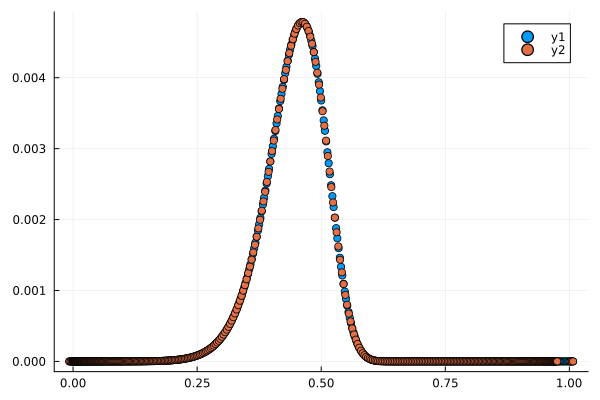

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

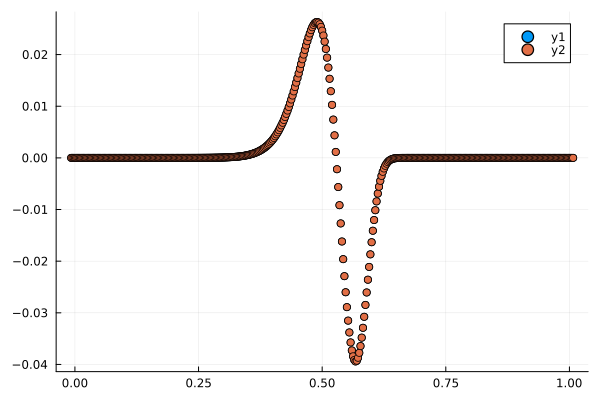

In [417]:
scatter([x1,x1],[y1,y2])